<a href="https://colab.research.google.com/github/aueskinj/Tasks/blob/master/SafaricomStockPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install ta
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects


In [3]:

import pandas as pd
import ta
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("/content/SafaricomStockPrice.csv")

In [10]:
df = pd.DataFrame(data)


In [11]:
# Convert columns to appropriate data types
df["Date"] = pd.to_datetime(df["Date"])
df["Open"] = pd.to_numeric(df["Open"])
df["High"] = pd.to_numeric(df["High"])
df["Low"] = pd.to_numeric(df["Low"])
df["Close"] = pd.to_numeric(df["Close"])
df["Average"] = pd.to_numeric(df["Average"])
df["Volume"] = df["Volume"].str.replace(",", "").astype(int)

In [12]:
# Set the Date column as the index
df.set_index("Date", inplace=True)

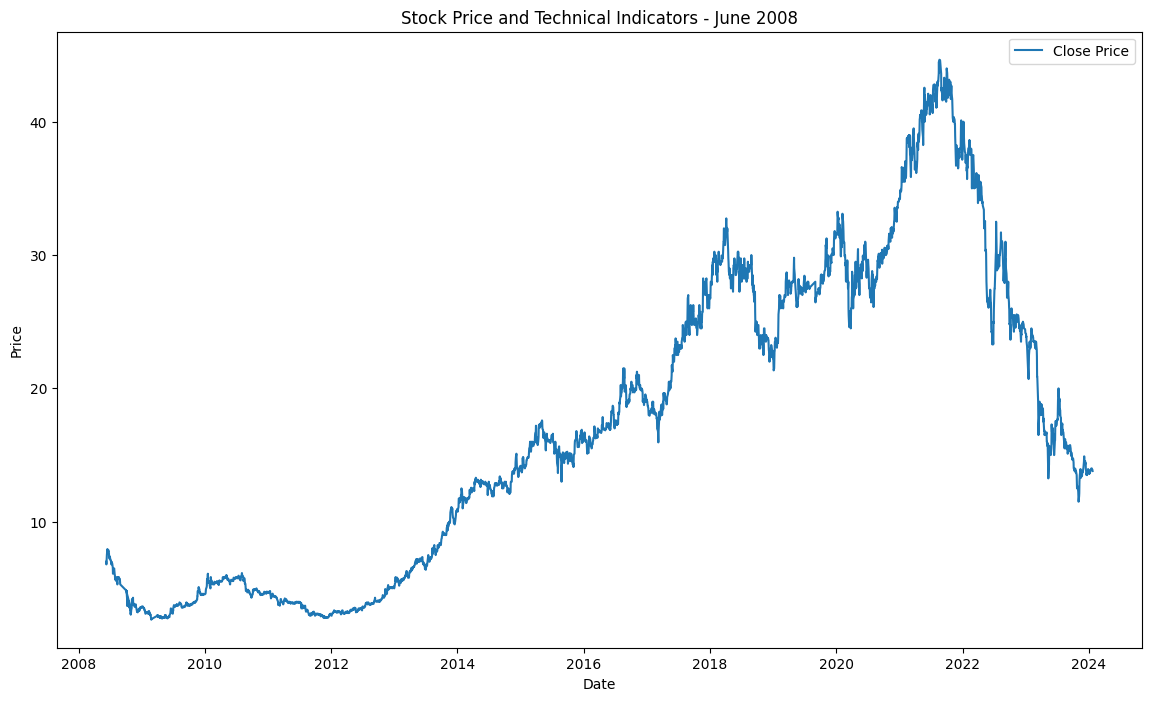

In [13]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df["Close"], label="Close Price")
plt.title("Stock Price and Technical Indicators - June 2008")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

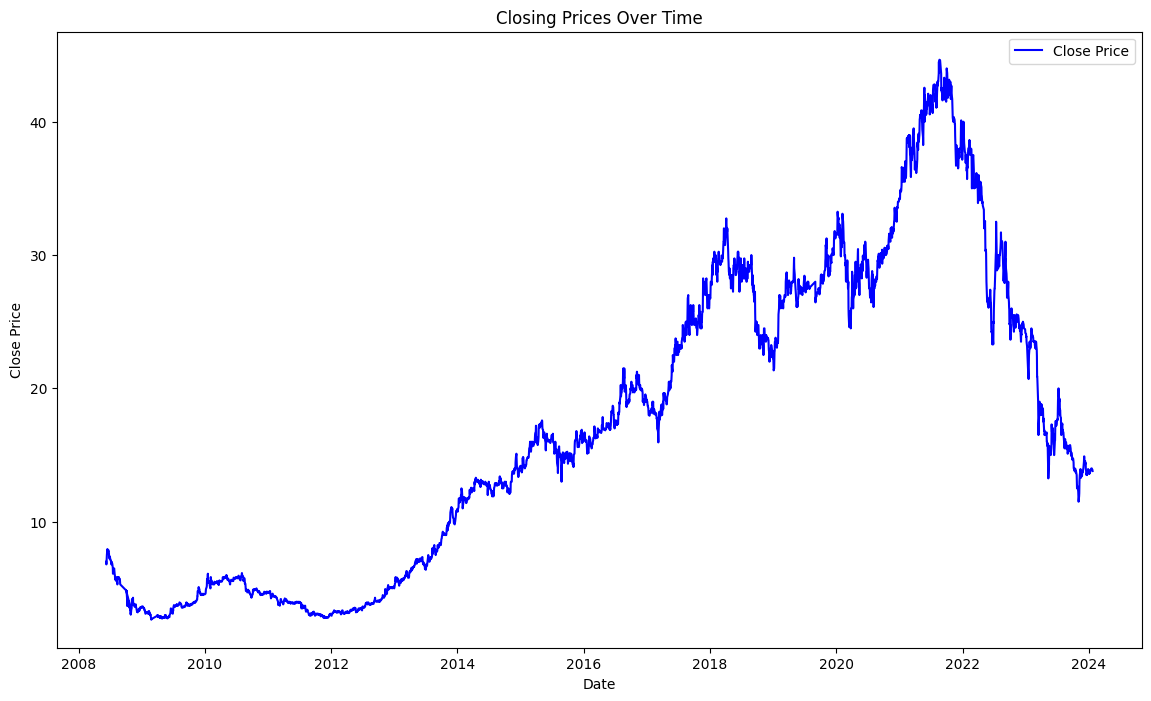

In [14]:
#Line Chart For closing Price
plt.figure(figsize=(14, 8))
plt.plot(df["Close"], label="Close Price", color='blue')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

## Candlestick Chart:
Represent each day's trading information, including open, high, low, and close prices, using candlesticks

In [16]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


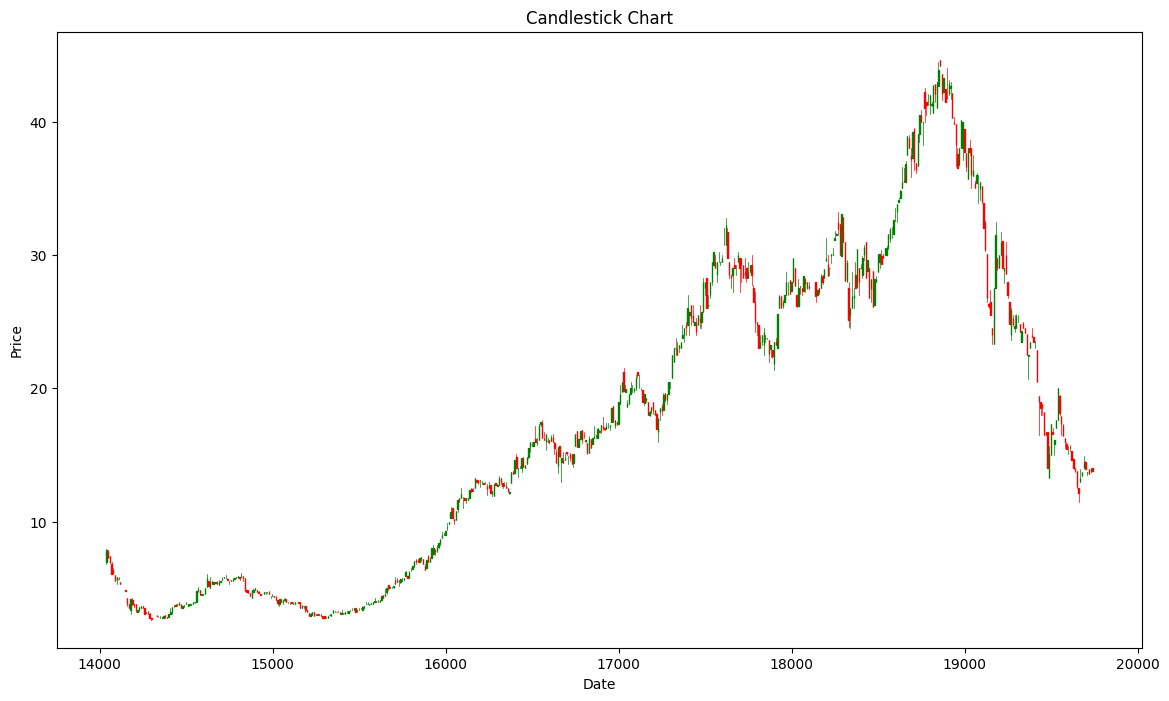

In [17]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = df["Close"].resample('10D').ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

plt.figure(figsize=(14, 8))
candlestick_ohlc(plt.gca(), df_ohlc.values, width=2, colorup='g', colordown='r')
plt.title("Candlestick Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Indicators

## Moving Averages:

Simple Moving Average (SMA): Represents the average of a security's prices over a specified period, giving a smoothed trend line.
Exponential Moving Average (EMA): Similar to SMA but gives more weight to recent prices, making it more responsive to current price movements.

## Relative Strength Index (RSI):

Measures the magnitude of recent price changes to evaluate overbought or oversold conditions. RSI values above 70 may indicate overbought, while values below 30 may suggest oversold.

## MACD (Moving Average Convergence Divergence):

Consists of two lines – MACD line and Signal line. It helps identify trend direction, momentum, and potential reversal points.

## Bollinger Bands:

Comprises a middle band being an N-period simple moving average, an upper band at K times an N-period standard deviation above the middle band, and a lower band at K times an N-period standard deviation below the middle band. Useful for identifying volatility and potential reversal points.

## Stochastic Oscillator:

Measures the location of a current close relative to its price range over a defined period. Helps identify overbought and oversold conditions.

## Average True Range (ATR):

Measures market volatility by calculating the average range between the high and low prices over a specified period.


## On-Balance Volume (OBV):

Cumulative indicator that adds or subtracts volume based on whether the closing price moves higher or lower. Helps identify potential trend reversals.

## Moving Average Convergence Divergence Histogram (MACD Histogram):

Represents the difference between the MACD line and the Signal line. Helps identify changes in momentum.

## Average Directional Index (ADX):

Measures the strength of a trend rather than its direction. A rising ADX suggests a strengthening trend, while a falling ADX indicates a weakening trend.

## Parabolic SAR (Stop and Reverse):

Provides potential reversal points for a price trend. It appears as dots above or below the price chart.

## Ichimoku Cloud:

Consists of several lines that help identify support and resistance levels, trend direction, and potential reversal points.

## Moving Averages

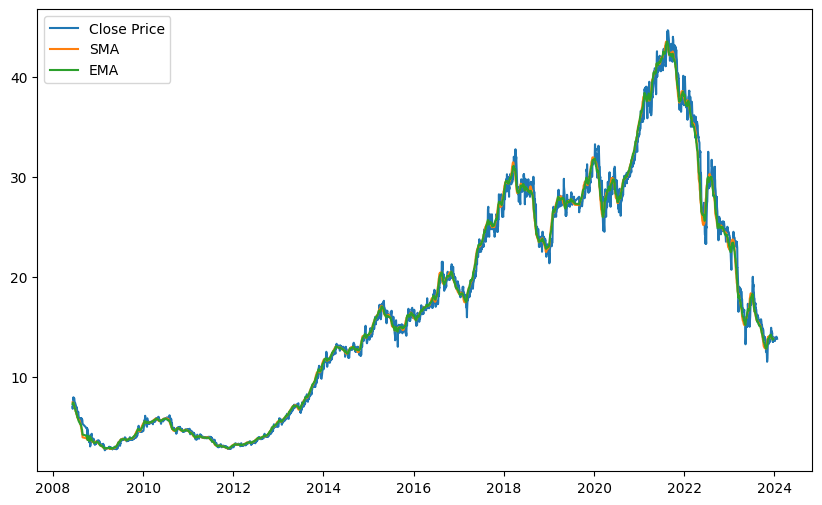

In [39]:
# Calculate Simple Moving Average (SMA)
df['sma'] = ta.trend.sma_indicator(df['Close'], window=20)
# Calculate Exponential Moving Average (EMA)
df['ema'] = ta.trend.ema_indicator(df['Close'], window=20)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['sma'], label='SMA')
plt.plot(df.index, df['ema'], label='EMA')
plt.legend()
plt.show()

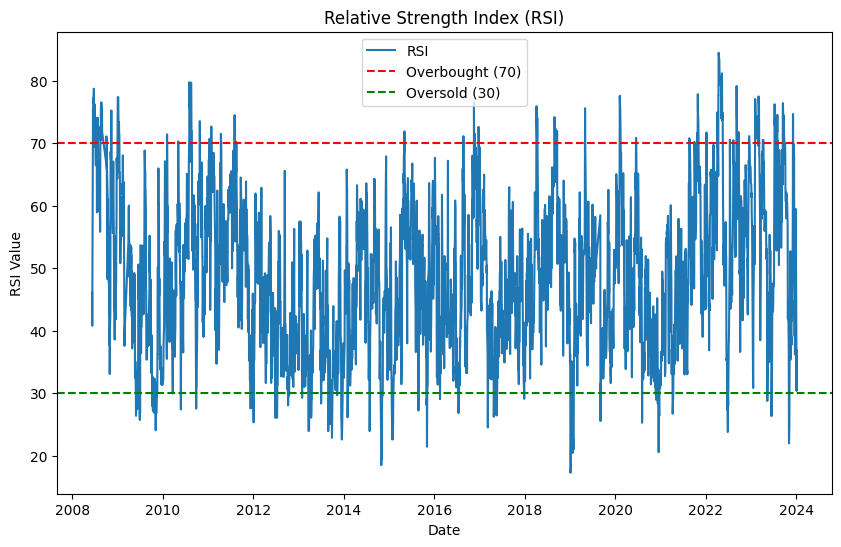

In [38]:
# Calculate Relative Strength Index (RSI)
df['rsi'] = ta.momentum.RSIIndicator(df['Close']).rsi()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['rsi'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.show()

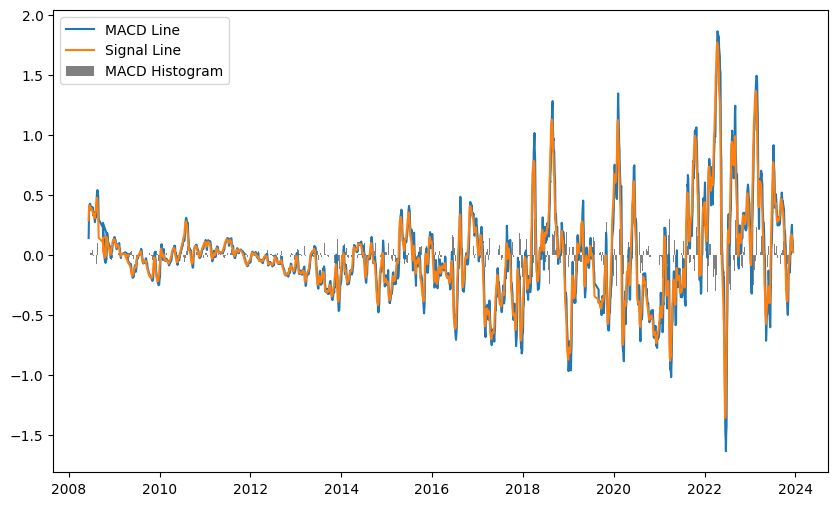

In [45]:
# Calculate Moving Average Convergence Divergence (MACD)
df['macd'] = ta.trend.MACD(df['Close']).macd()
df['macd_signal'] = ta.trend.ema_indicator(df['macd'], window=9, fillna=True)
df['macd_hist'] = df['macd'] - df['macd_signal']

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['macd'], label='MACD Line')
plt.plot(df.index, df['macd_signal'], label='Signal Line')
plt.bar(df.index, df['macd_hist'], label='MACD Histogram', color='gray')
plt.legend()
plt.show()

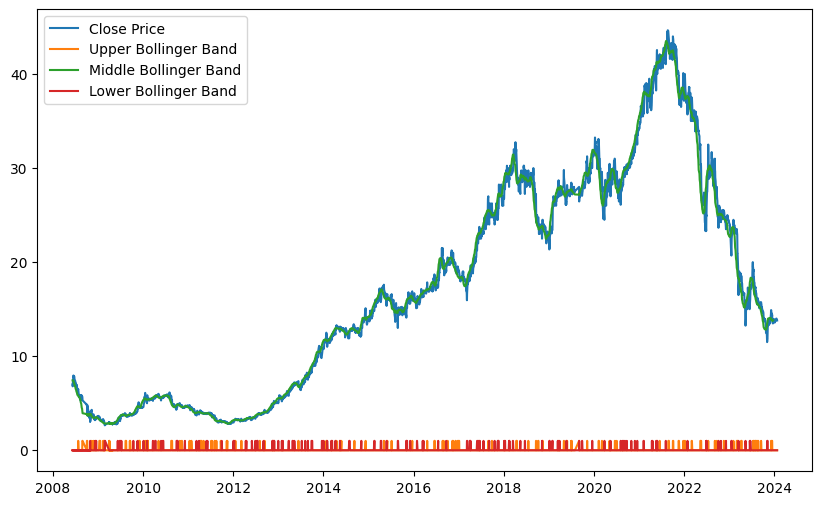

In [46]:
# Calculate Bollinger Bands
df['bb_upper'], df['bb_middle'], df['bb_lower'] = ta.volatility.bollinger_hband_indicator(df['Close']), ta.volatility.bollinger_mavg(df['Close']), ta.volatility.bollinger_lband_indicator(df['Close'])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['bb_upper'], label='Upper Bollinger Band')
plt.plot(df.index, df['bb_middle'], label='Middle Bollinger Band')
plt.plot(df.index, df['bb_lower'], label='Lower Bollinger Band')
plt.legend()
plt.show()

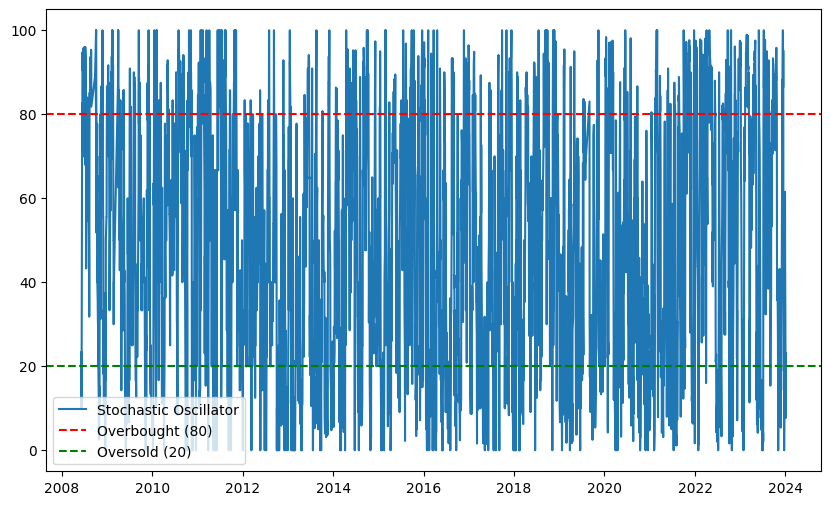

In [47]:
# Calculate Stochastic Oscillator
df['stoch_osc'] = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close']).stoch()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['stoch_osc'], label='Stochastic Oscillator')
plt.axhline(y=80, color='r', linestyle='--', label='Overbought (80)')
plt.axhline(y=20, color='g', linestyle='--', label='Oversold (20)')
plt.legend()
plt.show()

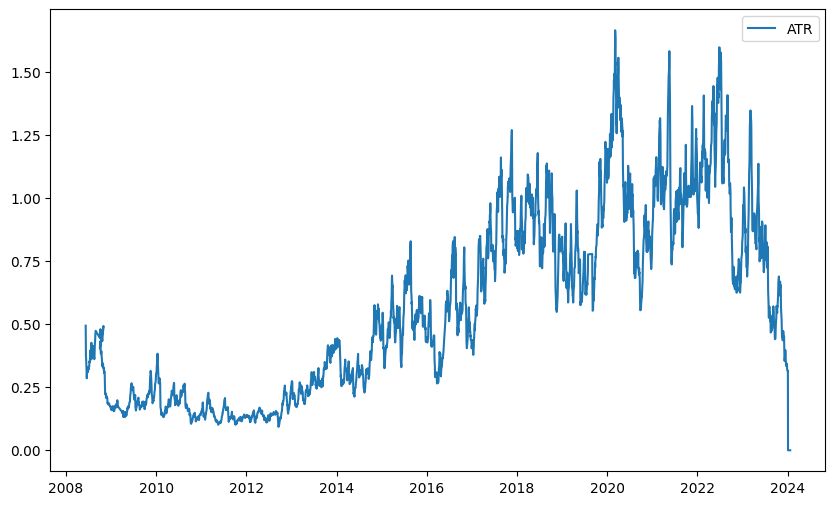

In [48]:
#average True Range
df['atr'] = ta.volatility.average_true_range(df['High'], df['Low'], df['Close'])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['atr'], label='ATR')
plt.legend()
plt.show()

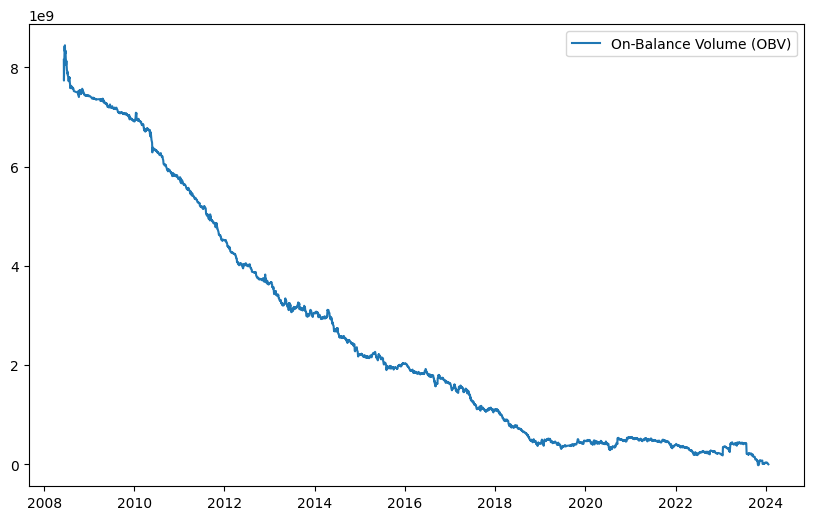

In [50]:
#on balance volume
df['obv'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['obv'], label='On-Balance Volume (OBV)')
plt.legend()
plt.show()

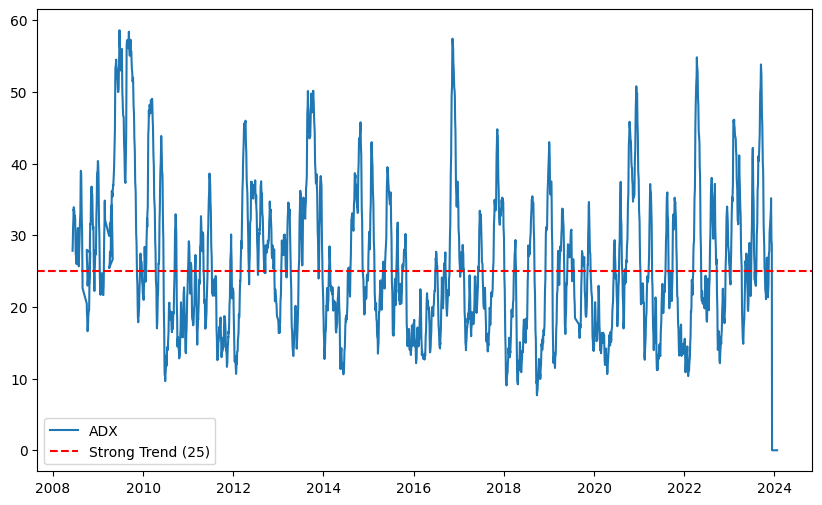

In [51]:
#average directional index
df['adx'] = ta.trend.adx(df['High'], df['Low'], df['Close'])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['adx'], label='ADX')
plt.axhline(y=25, color='r', linestyle='--', label='Strong Trend (25)')
plt.legend()
plt.show()

In [64]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=036e42d3d181950ac58ecb3117f055474ea1173f8b7a2ff652ca901fd61407ad
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


AttributeError: module 'ta' has no attribute 'psar'

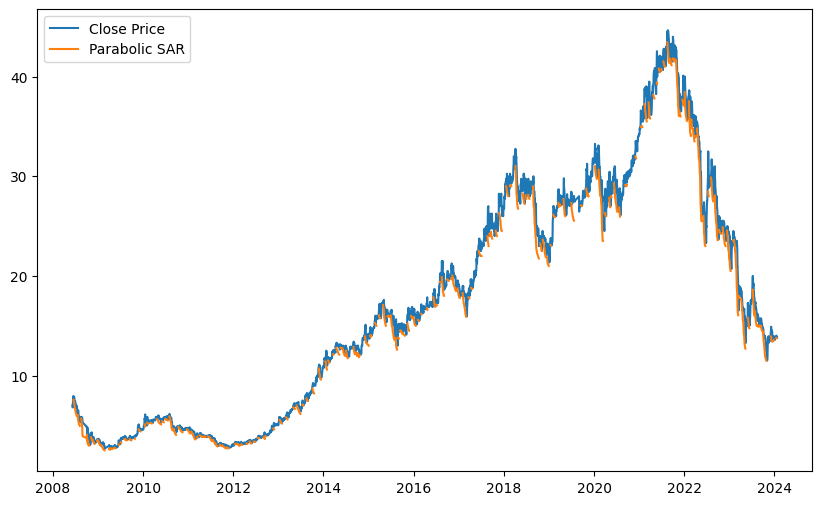

In [70]:
import pandas_ta as pta

# Assuming df is your DataFrame with the necessary columns, and 'Date' is the index
psar_data = pta.psar(df['High'], df['Low'], df['Close'])
df['parabolic_sar'] = psar_data['PSARl_0.02_0.2']

# Plot Parabolic SAR
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['parabolic_sar'], label='Parabolic SAR')
plt.legend()
plt.show()

In [41]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Average', 'Volume', 'sma', 'ema',
       'rsi', 'macd', 'bb_upper', 'bb_middle', 'bb_lower', 'stoch_osc'],
      dtype='object')
